# Boston Challenge - Regression One

## Part One - Exploratory Data Analysis

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from PIL import Image

data = pd.read_csv("boston_corrected.csv")

In [94]:
data.head()

,TOWN,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [95]:
data.describe() # count is complete, no missing data

,TOWNNO,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,47.531621,2700.357708,-71.056389,42.216440,22.532806,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,27.571401,1380.038110,0.075405,0.061777,9.197104,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.000000,1.000000,-71.289500,42.030000,5.000000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,26.250000,1303.250000,-71.093225,42.180775,17.025000,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,42.000000,3393.500000,-71.052900,42.218100,21.200000,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,78.000000,3739.750000,-71.019625,42.252250,25.000000,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,91.000000,5082.000000,-70.810000,42.381000,50.000000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [96]:
columns = list(data.columns)
unused_columns = ["TOWN", "TOWNNO", "TRACT", "LON", "LAT", "MEDV"]
for col in unused_columns:
    columns.remove(col)
data = data[columns]

In [97]:
data.head() # all numeric data ready for t-SNE

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


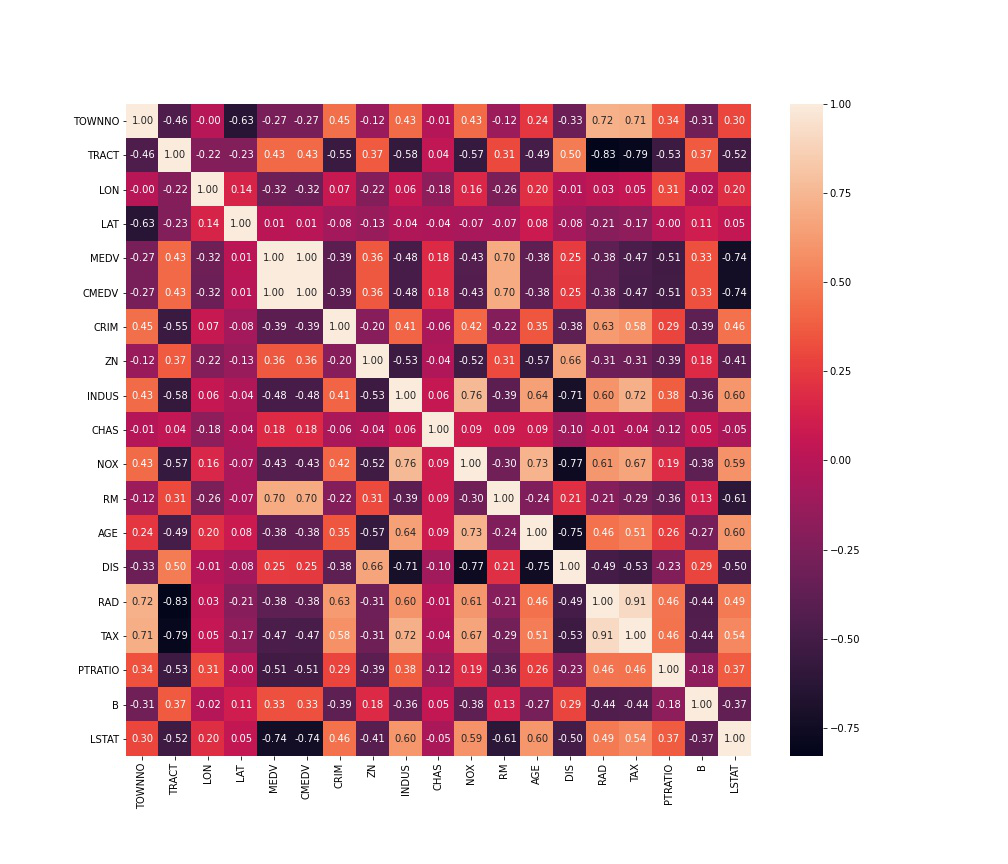

In [98]:
# correlation coefficients
if not os.path.exists("out/heatmap.jpeg"):
    fig, ax = plt.subplots(figsize=(14, 12))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.savefig("out/heatmap.jpeg")
else:
    img = Image.open("out/heatmap.jpeg")
    display(img)

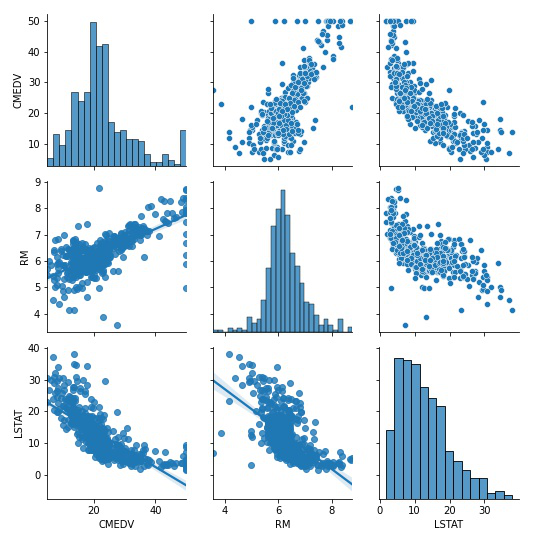

In [99]:
if os.path.exists("out/pairplot.jpeg"):
    img = Image.open("out/pairplot.jpeg")
    display(img)
else:
    plt.figure(figsize=(12,12))
    g = sns.PairGrid(data[["CMEDV", "RM", "LSTAT"]])
    g.map_diag(sns.histplot)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.regplot)
    plt.savefig("out/pairplot.jpeg")

## Part Two - Regression w/o Spatial Data

In [100]:
# models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor, plot_tree
from catboost import CatBoostRegressor, Pool
from sklearn.neural_network import MLPRegressor

# processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline

#hyper parameter search
import optuna

#gpu support
from numba import jit

optuna.logging.set_verbosity(optuna.logging.CRITICAL)

In [101]:
kf = KFold(n_splits=4, shuffle=True, random_state=42) # split data
X = data[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]]
y = data[["CMEDV"]]

@jit
def evaluate_model(model):
    res = cross_validate(X=X, y=y, estimator=model, cv=kf, fit_params=None, 
                    return_train_score=True, return_estimator=False,
                    scoring=["r2", "neg_mean_squared_error"])
    test_scores = {
        "r2": np.mean(res["test_r2"]),
        "mse": abs(np.mean(res["test_neg_mean_squared_error"]))
    }
    train_scores = {
        "r2": np.mean(res["train_r2"]),
        "mse": abs(np.mean(res["train_neg_mean_squared_error"]))
    }
    fit_time = np.mean(res["fit_time"])
    score_time = np.mean(res["score_time"])
    return test_scores, train_scores, fit_time, score_time

In [102]:
# linear regression model
linear_model = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True, normalize=False, positive=False))
test_scores, train_scores, fit_time, score_time = evaluate_model(linear_model)
print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

Test Scores: {'r2': 0.7178446686547839, 'mse': 22.95671894828107}
Train Scores: {'r2': 0.74579631185651, 'mse': 21.302696357201313}
Fit Time: 0.004566967487335205s
Score Time: 0.003204643726348877s


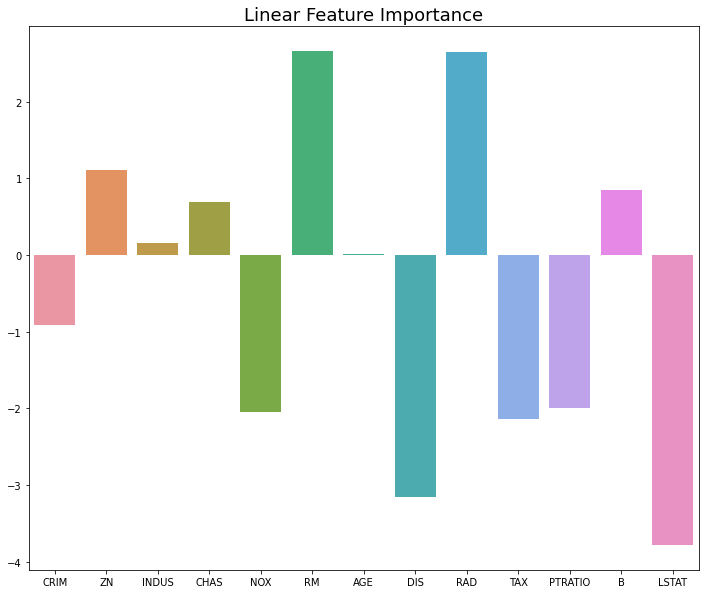

In [127]:
# feature importance
if os.path.exists("out/linear_feature_importance.jpeg"):
    img = Image.open("out/linear_feature_importance.jpeg")
    display(img)
else:
    linear_model_importance = LinearRegression(fit_intercept=True, normalize=False, positive=False)
    scaler = StandardScaler()
    linear_model_importance.fit(scaler.fit_transform(X), y)
    importance = linear_model_importance.coef_[0]
    plt.figure(figsize=(12, 10))
    plt.title("Linear Feature Importance", fontsize=18)
    sns.barplot(X.columns, importance)
    plt.savefig("out/linear_feature_importance.jpeg")
    plt.show()

In [104]:
# adaboost regression
# for all parameters: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
def ada_objective(trial):
    parameters = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.5, 1.0),
        "loss": trial.suggest_categorical("loss", ["linear", "square", "exponential"])
    }

    ada_model = AdaBoostRegressor(base_estimator=None, random_state=42, **parameters)
    test_scores = evaluate_model(ada_model)

    return test_scores[0]["mse"] # objective is to minimize mse

ada_study = optuna.create_study()
ada_study.optimize(ada_objective, n_trials=100, show_progress_bar=True)

print(f"Best parameters: {ada_study.best_params}")

opt_ada_model = AdaBoostRegressor(base_estimator=None, random_state=42, **ada_study.best_params)
test_scores, train_scores, fit_time, score_time = evaluate_model(opt_ada_model)
print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

100%|██████████| 100/100 [01:22<00:00,  1.21it/s]
Best parameters: {'n_estimators': 79, 'learning_rate': 0.70100330811887, 'loss': 'exponential'}
Test Scores: {'r2': 0.831569111258607, 'mse': 13.760353811154628}
Train Scores: {'r2': 0.9124094214602095, 'mse': 7.340214305826794}
Fit Time: 0.10823708772659302s
Score Time: 0.00880354642868042s


In [105]:
# xgboost regression model
# for all parameters: https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
def xgb_objective(trial):
    parameters = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 2, 5),
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "learning_rate": trial.suggest_float("learning_rate", 0.5, 1.0),
        "loss": trial.suggest_categorical("loss", ["linear", "square", "exponential"]),
        "gamma": trial.suggest_float("gamma", 0, 20)
    }

    xgb_model = XGBRegressor(verbosity=0, random_state=42, **parameters)
    test_scores = evaluate_model(xgb_model)

    return test_scores[0]["mse"] # objective is to minimize mse

xgb_study = optuna.create_study()
xgb_study.optimize(xgb_objective, n_trials=100, show_progress_bar=True)

print(f"Best parameters: {xgb_study.best_params}")

opt_xgb_model = XGBRegressor(verbosity=0, random_state=42, **xgb_study.best_params)
test_scores, train_scores, fit_time, score_time = evaluate_model(opt_xgb_model)
print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

100%|██████████| 100/100 [01:22<00:00,  1.22it/s]
Best parameters: {'n_estimators': 241, 'max_depth': 3, 'booster': 'dart', 'learning_rate': 0.5007191206786994, 'loss': 'exponential', 'gamma': 6.1665100177656464}
Test Scores: {'r2': 0.8811554461468073, 'mse': 9.871969072125431}
Train Scores: {'r2': 0.983869448535929, 'mse': 1.3567298303188693}
Fit Time: 0.2781183123588562s
Score Time: 0.013144731521606445s


In [106]:
# catboost regression model
# self optimising
cat_model = CatBoostRegressor(logging_level="Silent", cat_features=["CHAS"])
test_scores, train_scores, fit_time, score_time = evaluate_model(cat_model)
print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

Test Scores: {'r2': 0.8900240391522004, 'mse': 9.112841668593683}
Train Scores: {'r2': 0.9969790411000885, 'mse': 0.25512831649013745}
Fit Time: 1.4353916645050049s
Score Time: 0.005599379539489746s


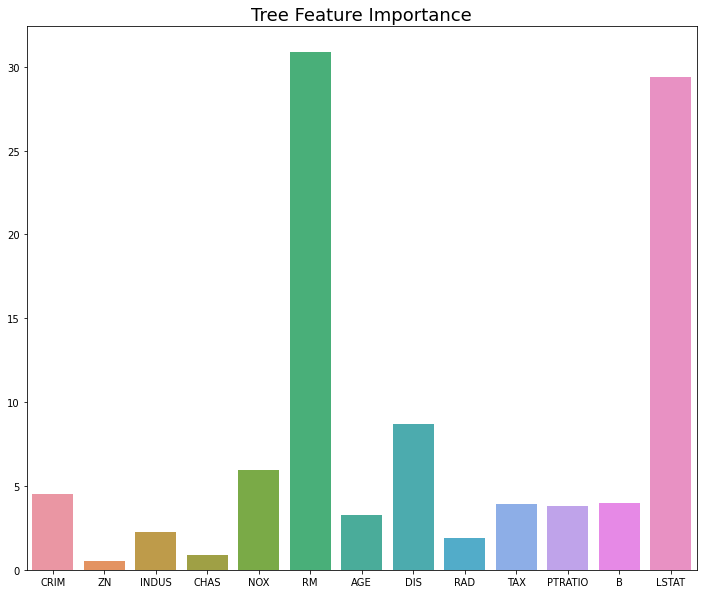

In [126]:
cat_model_ = CatBoostRegressor(logging_level="Silent", cat_features=["CHAS"])
pool = Pool(X, y, cat_features=["CHAS"], feature_names=list(X.columns))
cat_model_.fit(pool)
plt.figure(figsize=(12, 10))
sns.barplot(cat_model_.feature_names_, cat_model_.feature_importances_)
plt.title("Tree Feature Importance", fontsize=18)
plt.savefig("out/tree_feature_importance")
plt.show()

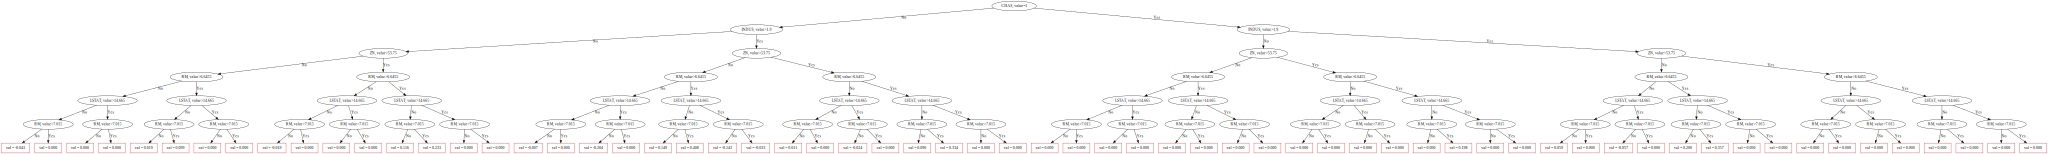

In [129]:
dot = cat_model_.plot_tree(tree_idx=10, pool=pool)
dot

In [130]:
dot.render("out/tree", format="png", cleanup=True)

'out/tree.png'

In [110]:
# neural network mlp regression model
# for all parameters: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

def mlp_objective(trial):
    parameters = {
        "activation": trial.suggest_categorical("activation", ["identity", "logistic", "tanh", "relu"]),
        "solver": trial.suggest_categorical("solver", ["lbfgs", "sgd", "adam"]),
        "alpha": trial.suggest_float("alpha", 1e-4, 5e-4),
        "learning_rate": trial.suggest_categorical("learning_rate", ["constant", "invscaling", "adaptive"]),
        "learning_rate_init": trial.suggest_float("learning_rate_init", 1e-3, 5e-3),
        "tol": trial.suggest_float("tol", 1e-4, 5e-4),
        "hidden_layer_sizes": [trial.suggest_int(f"layer_{i}_size", 4, 128) for i in range(trial.suggest_int("n_layers", 1, 3))]
    }

    mlp_model = MLPRegressor(verbose=False, random_state=42, **parameters)
    test_scores = evaluate_model(mlp_model)

    return test_scores[0]["mse"] # objective is to minimize mse

mlp_study = optuna.create_study()
mlp_study.optimize(mlp_objective, n_trials=100, show_progress_bar=True)

best_params = mlp_study.best_params
hidden_layer_sizes = [best_params.pop(f"layer_{i}_size") for i in range(best_params.pop("n_layers"))]
print(f"Hidden layers: {hidden_layer_sizes}")
print(f"Best parameters: {best_params}")


opt_mlp_model = MLPRegressor(verbose=False, random_state=42, **best_params)
test_scores, train_scores, fit_time, score_time = evaluate_model(opt_mlp_model)
print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

100%|██████████| 100/100 [07:52<00:00,  4.73s/it]
Hidden layers: [36, 87]
Best parameters: {'activation': 'identity', 'solver': 'lbfgs', 'alpha': 0.00010527175295124129, 'learning_rate': 'adaptive', 'learning_rate_init': 0.0036604334945861236, 'tol': 0.0004909845865508922}
Test Scores: {'r2': 0.677052182685883, 'mse': 25.921140647451026}
Train Scores: {'r2': 0.7095620587306742, 'mse': 24.332220793340063}
Fit Time: 0.6569783091545105s
Score Time: 0.01108860969543457s


In [112]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
# combined
final_estimator = DecisionTreeRegressor(max_depth=3)   

estimators = [
    ('xgb_0', opt_xgb_model),
    ('cat_0', cat_model),
    ('xgb_1', opt_xgb_model),
    ('cat_1', cat_model)
]

stack_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator)
test_scores, train_scores, fit_time, score_time = evaluate_model(stack_model)

print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

Test Scores: {'r2': 0.814410486439004, 'mse': 15.515438358099788}
Train Scores: {'r2': 0.9402022328738147, 'mse': 5.022842364891732}
Fit Time: 17.540962159633636s
Score Time: 0.07368892431259155s


## Part Three - Regression w/ Spatial Data

In [137]:
data["CLUST"] = pd.read_csv("clusters.csv")

In [138]:
data.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CLUST
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1.0
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1.0
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,18.0
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,18.0
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,18.0


In [139]:
# add clust data to X
X = data[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "CLUST"]]

In [140]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CLUST
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,1.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,1.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,18.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,18.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,18.0


In [141]:
# perform CAT Boost
cat_model_1 = CatBoostRegressor(logging_level="Silent", cat_features=["CHAS", "CLUST"])
test_scores, train_scores, fit_time, score_time = evaluate_model(cat_model)
print(f"Test Scores: {test_scores}")
print(f"Train Scores: {train_scores}")
print(f"Fit Time: {fit_time}s")
print(f"Score Time: {score_time}s")

Test Scores: {'r2': 0.8934898067515067, 'mse': 8.725613355102025}
Train Scores: {'r2': 0.9972282334446623, 'mse': 0.23435338669541955}
Fit Time: 1.1393038034439087s
Score Time: 0.004426360130310059s
